In [21]:
! pip install catboost

In [22]:
! pip install xgboost

In [7]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [8]:
# Importing the train and test data

train_set = pd.read_csv("D:\\End-to-End ML Projects\\MLProject\\artifacts\\final_train_set.csv")
test_set = pd.read_csv("D:\\End-to-End ML Projects\\MLProject\\artifacts\\final_test_set.csv")

In [9]:
train_set.head()

,Unnamed: 0,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
0,0,0,25.0,0.50,0.25,0.75,0.50,69.7,24.0,0.425011,4476.81146
1,1,1,25.0,0.50,0.25,0.50,0.50,69.7,24.0,0.444908,5548.12201
2,2,2,12.5,0.25,0.25,0.63,0.63,86.0,24.0,0.552927,6869.77760
3,3,3,12.5,0.25,0.25,0.63,0.50,77.4,24.0,0.565976,6880.77590
4,4,4,25.0,0.50,0.25,0.63,0.63,77.4,24.0,0.579677,7479.93417


In [10]:
test_set.head()

,Unnamed: 0,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,0,15289,25.0,0.25,0.25,0.25,0.25,86.0,24.0,0.399367
1,1,15290,12.5,0.25,0.25,0.75,0.63,94.6,1.0,0.488048
2,2,15291,12.5,0.25,0.25,0.63,0.63,86.0,16.0,0.583379
3,3,15292,25.0,0.50,0.38,0.38,0.63,86.0,16.0,0.433014
4,4,15293,37.5,0.75,0.25,0.25,0.25,94.6,24.0,0.360996


As we don't have target variable in the test data, we will not able to evaluate the performance of the model. So the strategy to make the model more robust, I will divide split the train data and then will evalute on that whichever model is performing best and have less chances of overfitting then will select that model for prediction  

In [11]:
X = train_set.drop(columns = ['yield'])
y = train_set['yield']

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12231, 10), (3058, 10))

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 611.2656
- Mean Absolute Error: 392.1098
- R2 Score: 0.7918
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 601.1202
- Mean Absolute Error: 391.2677
- R2 Score: 0.7944


Lasso
Model performance for Training set
- Root Mean Squared Error: 611.6983
- Mean Absolute Error: 394.6576
- R2 Score: 0.7915
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 602.2784
- Mean Absolute Error: 394.4317
- R2 Score: 0.7937


Ridge
Model performance for Training set
- Root Mean Squared Error: 611.6013
- Mean Absolute Error: 395.5191
- R2 Score: 0.7916
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 601.7702
- Mean Absolute Error: 394.8362
- R2 Score: 0.7940


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1016.0581
- Mean Absolute Error: 804.2299
- R2 Score: 0

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.801858
6,XGBRegressor,0.794542
0,Linear Regression,0.794449
2,Ridge,0.794004
1,Lasso,0.793656
5,Random Forest Regressor,0.786226
8,AdaBoost Regressor,0.704376
4,Decision Tree,0.550309
3,K-Neighbors Regressor,0.101178


After applying all the regressor models, the best model we got is CatBoosting Regressor. Therefore, we will have the final prediction on test_set by the Catboosting model. 

In [16]:
# Create and train the CatBoostRegressor model
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

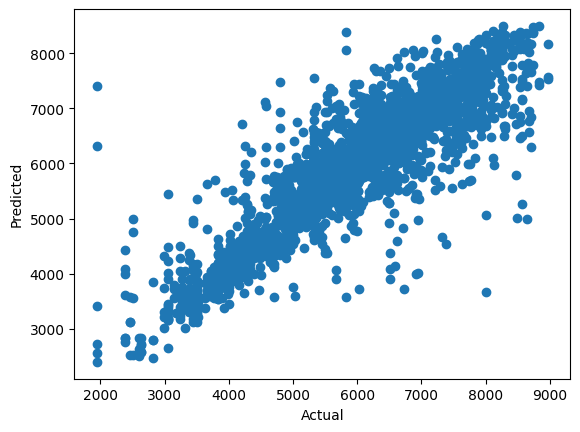

In [17]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


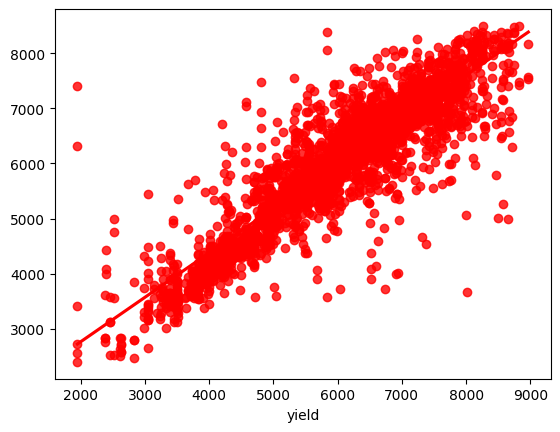

In [18]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');


In [19]:
test_set_predict = model.predict(test_set)

In [20]:
test_set_predict

array([3850.25199171, 6134.60049533, 7245.523566  , ..., 6733.3201403 ,
       4176.63248014, 7099.8535387 ])

So the above array we got is the final prediction of the test dataset 